# Computer Vision: Ex.4 - Contours

Submitted by: [ **Tal Haim** ]


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

plt.rc('image', cmap='gray') # set the default color-map of plt.image() to 'gray'
plt.rc('figure', figsize=[8,8]) # set a bigger default figure size

## Sickle cell anemia

*Sickle cell anemia* is a disorder of the blood caused by an inherited abnormal hemoglobin (the oxygen-carrying protein within the red blood cells). The abnormal hemoglobin causes distorted (sickled appearing under a microscope) red blood cells.


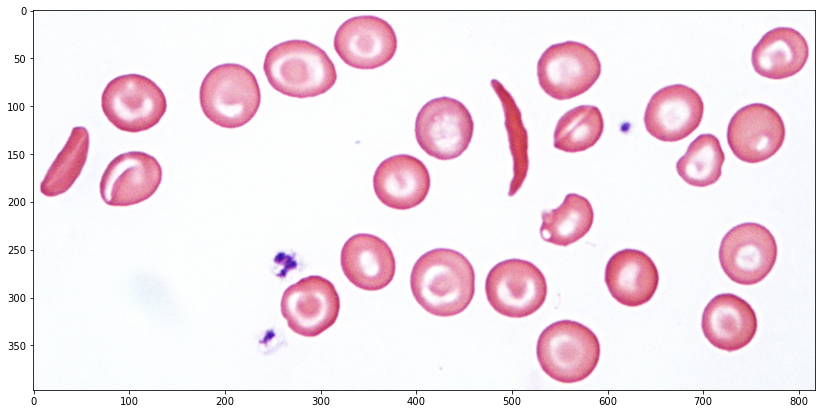

In [2]:
cells = cv2.cvtColor(cv2.imread('project4/SickleCellsCrop.png'),cv2.COLOR_BGR2RGB)

plt.figure(figsize=(14,8))
plt.imshow(cells)
plt.show()


### 1. Find contours

- Preprocess the image in such a way to allow you to **find the contours of all the blood cells** in the image.

- Display the original image with all the contours you found on top of it.

In [3]:
# place your code here.. 
# (you can add more code cells if you wish)
gray = cv2.cvtColor(cells,cv2.COLOR_RGB2GRAY)

In [4]:
blur = cv2.GaussianBlur(gray,(7,7),0)

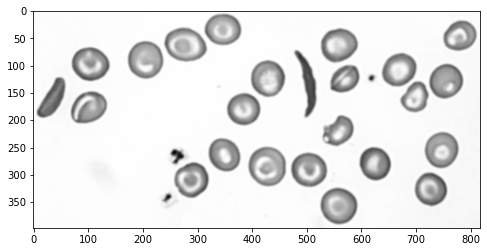

In [5]:
plt.imshow(blur)

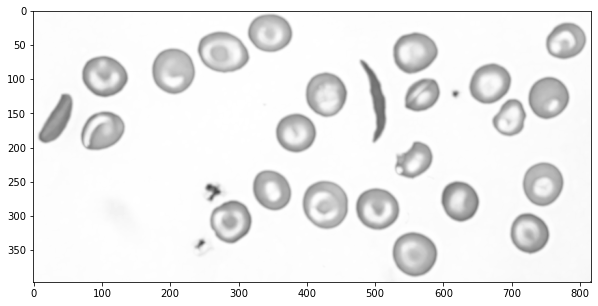

In [6]:
K = np.zeros((3,3), dtype=np.uint8)
K[2,:]=1
K[:,2]=1
image_dilate = cv2.dilate(blur,K)

plt.figure(figsize=(10,8))
plt.imshow(image_dilate)


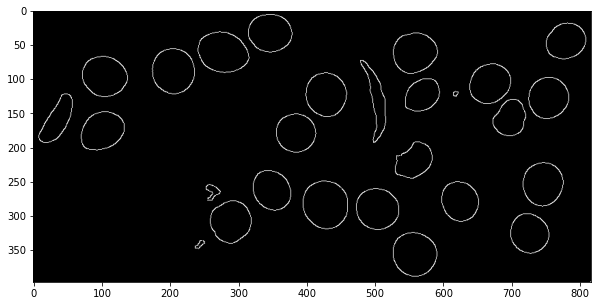

In [7]:
canny = cv2.Canny(image_dilate,50,320)
plt.figure(figsize=(10,8))
plt.imshow(canny)


In [8]:
contours, hierarchies = cv2.findContours(canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

### 2. Analyze the contours

- Try to find a criterion to distinguish between normal cells and sickle cells. 
- Count how many normal cells and how many sickle cells appear in the image.
- Mark the contours of normal cells in one color and the contours of sickle cells with a different color.

In [9]:
blank = np.zeros(cells.shape,dtype='uint8')


Text(0.5, 1.0, 'contours')

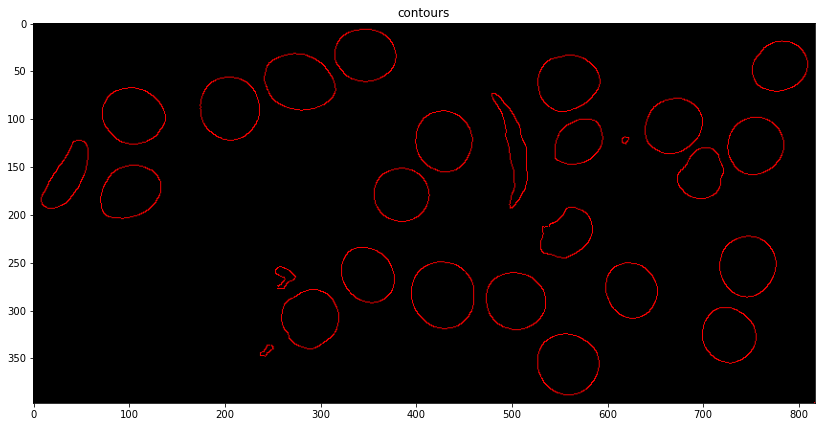

In [10]:
plt.figure(figsize=(14,8))
cv2.drawContours(blank,contours,-1,(255,0,0),1)
plt.imshow(blank)
plt.title('contours')

In [11]:
print(f'''{len(contours)} contour's found''')

52 contour's found


In [12]:

good_cells = list()
bad_cells = list()
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    if(abs(h/w)<1.4):
        area = cv2.contourArea(c)
        if(area>40):
            good_cells.append(c)
    else:
        if(area>30):
            bad_cells.append(c)

        

Text(0.5, 1.0, 'good cells')

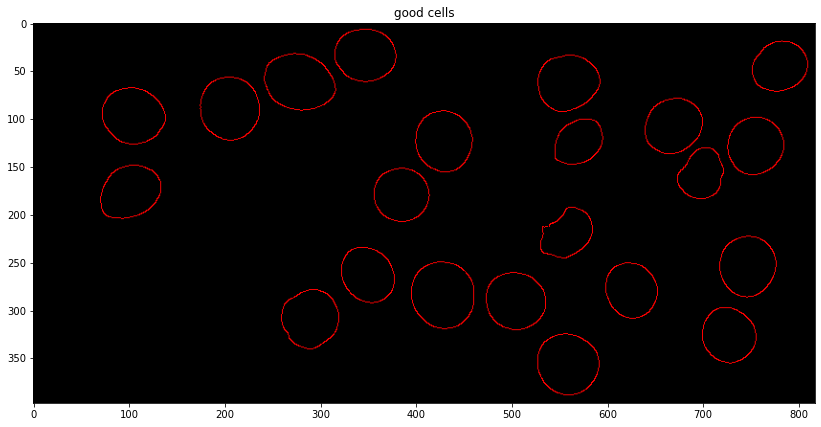

In [13]:
blank = np.zeros(cells.shape,dtype='uint8')
plt.figure(figsize=(14,8))
cv2.drawContours(blank,good_cells,-1,(255,0,0),1)
plt.imshow(blank)
plt.title('good cells')

Text(0.5, 1.0, 'bad cells')

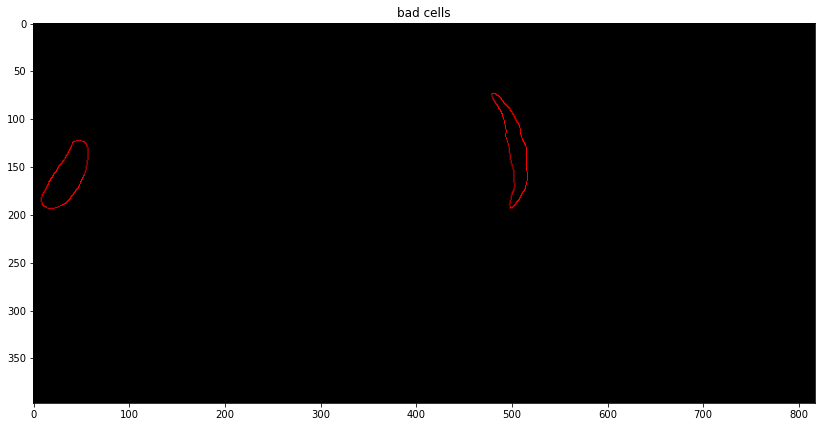

In [14]:
plt.figure(figsize=(14,8))
blank = np.zeros(cells.shape,dtype='uint8')
cv2.drawContours(blank,bad_cells,-1,(255,0,0),1)
plt.imshow(blank)
plt.title('bad cells')

In [15]:
sum_area=0
for c in good_cells:
    area = cv2.contourArea(c)
#     print(area)
    sum_area+=area
avgSize = sum_area/len(good_cells)
avgSize

2687.1976744186045

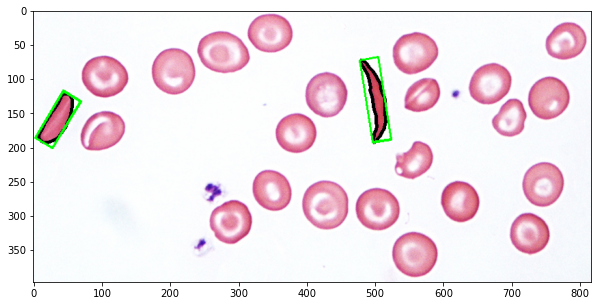

In [16]:
plt.figure(figsize=(10,16))
rgb = cells.copy()

cv2.drawContours(rgb,bad_cells,-1,(0,0,0),3)

for c in bad_cells:
    rot_rect = cv2.minAreaRect(c)
    box = np.int64(cv2.boxPoints(rot_rect))
    cv2.drawContours(rgb,[box],0,(0,255,0),2)

plt.imshow(rgb)

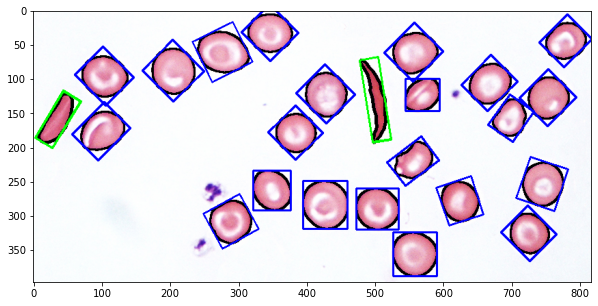

In [17]:
plt.figure(figsize=(10,16))

rgb = cells.copy()
cv2.drawContours(rgb,bad_cells,-1,(0,0,0),3)
cv2.drawContours(rgb,good_cells,-1,(0,0,0),2)

for c in bad_cells:
    rot_rect = cv2.minAreaRect(c)
    box = np.int64(cv2.boxPoints(rot_rect))
    cv2.drawContours(rgb,[box],0,(0,255,0),2)
    

for c in good_cells[::2]:
    rot_rect = cv2.minAreaRect(c)
    box = np.int64(cv2.boxPoints(rot_rect))
    cv2.drawContours(rgb,[box],0,(0,0,255),2)

plt.imshow(rgb)

In [18]:
red_cells = math.ceil(len(good_cells)/2)
print("Number of red blood cells= " + str(red_cells))


Number of red blood cells= 22


In [19]:
sickle = math.ceil(len(bad_cells)/2)
print("Number of sickle cells = " + str(sickle))


Number of sickle cells = 2


## Good Luck!